In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'D:\med-image-captioning\data\csv\database.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217060 entries, 0 to 217059
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   image_id    217060 non-null  object
 1   s2_caption  217060 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB
None


In [4]:
#read the second column of the csv file and count the words in each row
df['s2_caption'].apply(lambda x: len(x.split())).describe()

count    217060.000000
mean         59.702534
std          47.815307
min           3.000000
25%          26.000000
50%          47.000000
75%          78.000000
max         839.000000
Name: s2_caption, dtype: float64

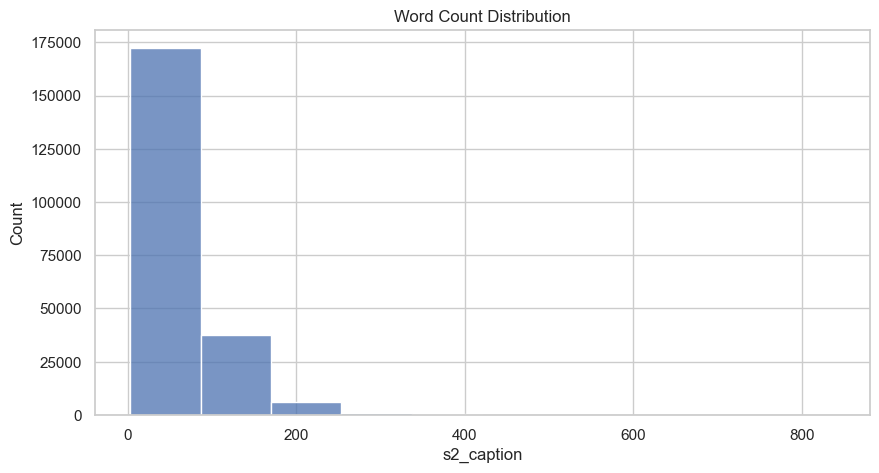

In [6]:
# make a plot to find the word count distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.histplot(df['s2_caption'].apply(lambda x: len(x.split())), bins=10)
plt.title('Word Count Distribution')
plt.show()

In [7]:
# calc the number of words that are in 10% of the mean caption length
mean_caption_length = df['s2_caption'].apply(lambda x: len(x.split())).mean()
print('Mean caption length: ', mean_caption_length)
# print('10% of the mean caption length: ', mean_caption_length*0.1)


Mean caption length:  59.70253386160508


In [9]:
#find the percentage of words that are in 10% of the mean caption length
per10=df['s2_caption'].apply(lambda x: len(x.split())).value_counts(normalize=False).sort_index().cumsum().head(10)
print(per10)

# find the percentage of words that are in 10% of the mean caption length
# df['s2_caption'].apply(lambda x: len(x.split())).value_counts(normalize=True).sort_index().cumsum().head(10)

s2_caption
3        14
4       253
5       778
6      1521
7      2664
8      4249
9      6174
10     8297
11    10545
12    13096
Name: count, dtype: int64


In [9]:
# choose 100 random rows and make a new dataframe
df = df.sample(n=100)
print(df.head())

                                               s2_caption  \
132087  Fig 3. ULD CT false negative example. 47yo mal...   
185441  Figure 7. PKGII reverses the apoptosis-reducin...   
9365    Figure 2 Erect posteroanterior chest radiograp...   
139210  Fig 2. A 48-year-old patient with IDC in the l...   
140098  FIG. 1. [125I]-sCT binding assay. A, B, C, and...   

                                                image_uri  
132087  780d51420ad492a61d00295adb6919bd492e6bd3_8-Fig...  
185441  4fd909ba5e5ee6d90fae6967acd2f54cc9f8b4bf_4-Fig...  
9365    2b67d96df5488d5c3320f1626ba098c1b10b5a17_1-Fig...  
139210  11357dcc40909413166afbddffe7b6b2f2e3309b_8-Fig...  
140098  ba5b8e81fb34a0c30922cdcc04f7bef567330e39_2-Fig...  


In [10]:
# save the new dataframe to a csv file
df.to_csv('C:\\Users\\Νίκος Λιθαρής\\OneDrive - ionio.gr\\Desktop\\thesis\\data\\csv\\image_uri_and_captions_100.csv', index=False)
